# ASSIGNMENT 3

#####  NAME: RISHAV KUMAR
#####  ROLL NO. 2301560042

My github account link : [Github](https://github.com/risav68111/AIML_Assignment)


------

# QUESTION 1


Dataset source : [CDC data](https://www.kaggle.com/datasets/spittman1248/cdc-data-nutrition-physical-activity-obesity/)



###  CDC Data: Nutrition, Physical Activity, & Obesity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\risha\Documents\KRMU\AIML_assigment\datasets\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [5]:
df=df.drop(['Low_Confidence_Limit',
         'High_Confidence_Limit ',
         'Total',
         'Data_Value_Alt', 
         'YearEnd','Topic',
         'Class','Datasource',
         'Data_Value_Unit',
         'QuestionID',
         'ClassID',
         'TopicID',
         'DataValueTypeID',
         'Data_Value_Type',
         'Data_Value_Footnote_Symbol',
         'Data_Value_Footnote',
         'StratificationCategoryId1',
         'StratificationID1'], axis=1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                53392 non-null  int64  
 1   LocationAbbr             53392 non-null  object 
 2   LocationDesc             53392 non-null  object 
 3   Question                 53392 non-null  object 
 4   Data_Value               48346 non-null  float64
 5   Sample_Size              48346 non-null  float64
 6   Age(years)               11438 non-null  object 
 7   Education                7628 non-null   object 
 8   Gender                   3814 non-null   object 
 9   Income                   13349 non-null  object 
 10  Race/Ethnicity           15256 non-null  object 
 11  GeoLocation              52384 non-null  object 
 12  LocationID               53392 non-null  int64  
 13  StratificationCategory1  53392 non-null  object 
 14  Stratification1       

In [7]:
df=df.drop(['GeoLocation',
            'Question', 
            'StratificationCategory1', 
            'Stratification1', 
            'Gender'], axis=1)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       53392 non-null  int64  
 1   LocationAbbr    53392 non-null  object 
 2   LocationDesc    53392 non-null  object 
 3   Data_Value      48346 non-null  float64
 4   Sample_Size     48346 non-null  float64
 5   Age(years)      11438 non-null  object 
 6   Education       7628 non-null   object 
 7   Income          13349 non-null  object 
 8   Race/Ethnicity  15256 non-null  object 
 9   LocationID      53392 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.1+ MB


In [9]:
df=df.dropna(subset=['Education'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7628 entries, 3 to 53370
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       7628 non-null   int64  
 1   LocationAbbr    7628 non-null   object 
 2   LocationDesc    7628 non-null   object 
 3   Data_Value      7628 non-null   float64
 4   Sample_Size     7628 non-null   float64
 5   Age(years)      0 non-null      object 
 6   Education       7628 non-null   object 
 7   Income          0 non-null      object 
 8   Race/Ethnicity  0 non-null      object 
 9   LocationID      7628 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 655.5+ KB


In [11]:
def lower_col_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

In [12]:
df=lower_col_names(df)

In [13]:
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1
5,2011,AL,Alabama,33.8,1925.0,NaN,Some college or technical school,NaN,NaN,1
6,2011,AL,Alabama,26.4,1812.0,NaN,College graduate,NaN,NaN,1
31,2011,AL,Alabama,33.2,1153.0,NaN,Less than high school,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
53343,2016,PR,Puerto Rico,33.9,1735.0,NaN,College graduate,NaN,NaN,72
53367,2016,VI,Virgin Islands,29.2,238.0,NaN,Less than high school,NaN,NaN,78
53368,2016,VI,Virgin Islands,26.9,394.0,NaN,High school graduate,NaN,NaN,78
53369,2016,VI,Virgin Islands,31.2,230.0,NaN,Some college or technical school,NaN,NaN,78


In [14]:
df.dtypes

yearstart           int64
locationabbr       object
locationdesc       object
data_value        float64
sample_size       float64
age(years)         object
education          object
income             object
race/ethnicity     object
locationid          int64
dtype: object

In [15]:
print(df.duplicated().sum())

8


In [16]:
df= df.drop_duplicates()

In [17]:
df.isna().sum()

yearstart            0
locationabbr         0
locationdesc         0
data_value           0
sample_size          0
age(years)        7620
education            0
income            7620
race/ethnicity    7620
locationid           0
dtype: int64

In [18]:
df.shape

(7620, 10)

In [19]:
df=df.drop(['age(years)', 'income', 'race/ethnicity'], axis=1)

In [20]:
p= df.isnull().sum() * 100 / len(df)
p

yearstart       0.0
locationabbr    0.0
locationdesc    0.0
data_value      0.0
sample_size     0.0
education       0.0
locationid      0.0
dtype: float64

####  Removing Outliers



In [21]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [22]:
remove_outliers(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,locationid
3,2011,AL,Alabama,33.6,1153.0,Less than high school,1
4,2011,AL,Alabama,32.8,2402.0,High school graduate,1
5,2011,AL,Alabama,33.8,1925.0,Some college or technical school,1
6,2011,AL,Alabama,26.4,1812.0,College graduate,1
31,2011,AL,Alabama,33.2,1153.0,Less than high school,1
...,...,...,...,...,...,...,...
53343,2016,PR,Puerto Rico,33.9,1735.0,College graduate,72
53367,2016,VI,Virgin Islands,29.2,238.0,Less than high school,78
53368,2016,VI,Virgin Islands,26.9,394.0,High school graduate,78
53369,2016,VI,Virgin Islands,31.2,230.0,Some college or technical school,78


### Standardizing the text in the data

In [24]:
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

In [25]:
standardize_text(df)

In [26]:
num_col= df.select_dtypes(include=['int','float']).columns
num= df[num_col]

In [27]:
num

,yearstart,data_value,sample_size,locationid
3,2011,33.6,1153.0,1
4,2011,32.8,2402.0,1
5,2011,33.8,1925.0,1
6,2011,26.4,1812.0,1
31,2011,33.2,1153.0,1
...,...,...,...,...
53343,2016,33.9,1735.0,72
53367,2016,29.2,238.0,78
53368,2016,26.9,394.0,78
53369,2016,31.2,230.0,78


In [28]:
num.isna().sum()

yearstart      0
data_value     0
sample_size    0
locationid     0
dtype: int64

In [29]:
cat_col= df.select_dtypes(include=['object']).columns
cat= df[cat_col]

In [30]:
cat

,locationabbr,locationdesc,education
3,al,alabama,less than high school
4,al,alabama,high school graduate
5,al,alabama,some college or technical school
6,al,alabama,college graduate
31,al,alabama,less than high school
...,...,...,...
53343,pr,puerto rico,college graduate
53367,vi,virgin islands,less than high school
53368,vi,virgin islands,high school graduate
53369,vi,virgin islands,some college or technical school


#### One-Hot Encoding for Categorical variables


In [31]:
cat.columns

Index(['locationabbr', 'locationdesc', 'education'], dtype='object')

In [32]:
#education
ed_map = {'less than high school': 0, 'high school graduate':1, 'some college or technical school':2,'college graduate':3}
ed_map
df['education'] = df['education'].map(ed_map)

In [33]:
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,locationid
3,2011,al,alabama,33.6,1153.0,0,1
4,2011,al,alabama,32.8,2402.0,1,1
5,2011,al,alabama,33.8,1925.0,2,1
6,2011,al,alabama,26.4,1812.0,3,1
31,2011,al,alabama,33.2,1153.0,0,1
...,...,...,...,...,...,...,...
53343,2016,pr,puerto rico,33.9,1735.0,3,72
53367,2016,vi,virgin islands,29.2,238.0,0,78
53368,2016,vi,virgin islands,26.9,394.0,1,78
53369,2016,vi,virgin islands,31.2,230.0,2,78


### Ploting distributions of numerical data

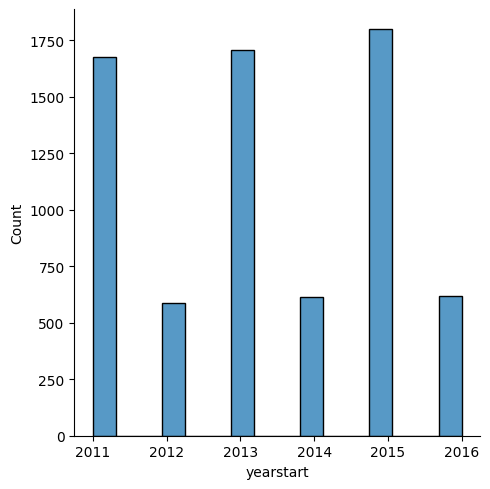

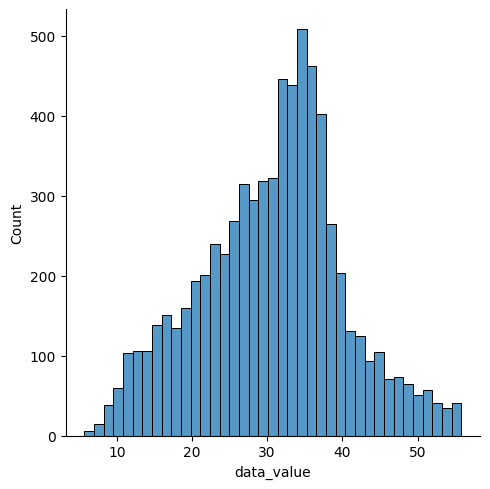

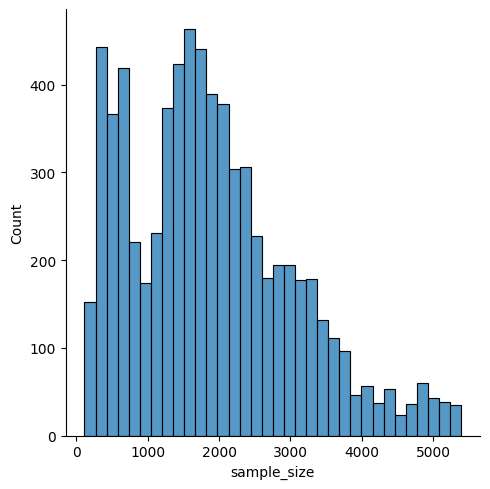

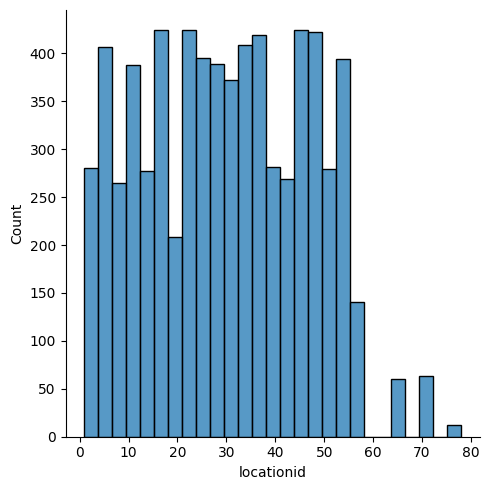

In [34]:
for col in num.columns:
    sns.displot(num[col])
    plt.show()

In [35]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 3 to 53370
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yearstart    7002 non-null   int64  
 1   data_value   7002 non-null   float64
 2   sample_size  7002 non-null   float64
 3   locationid   7002 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 273.5 KB


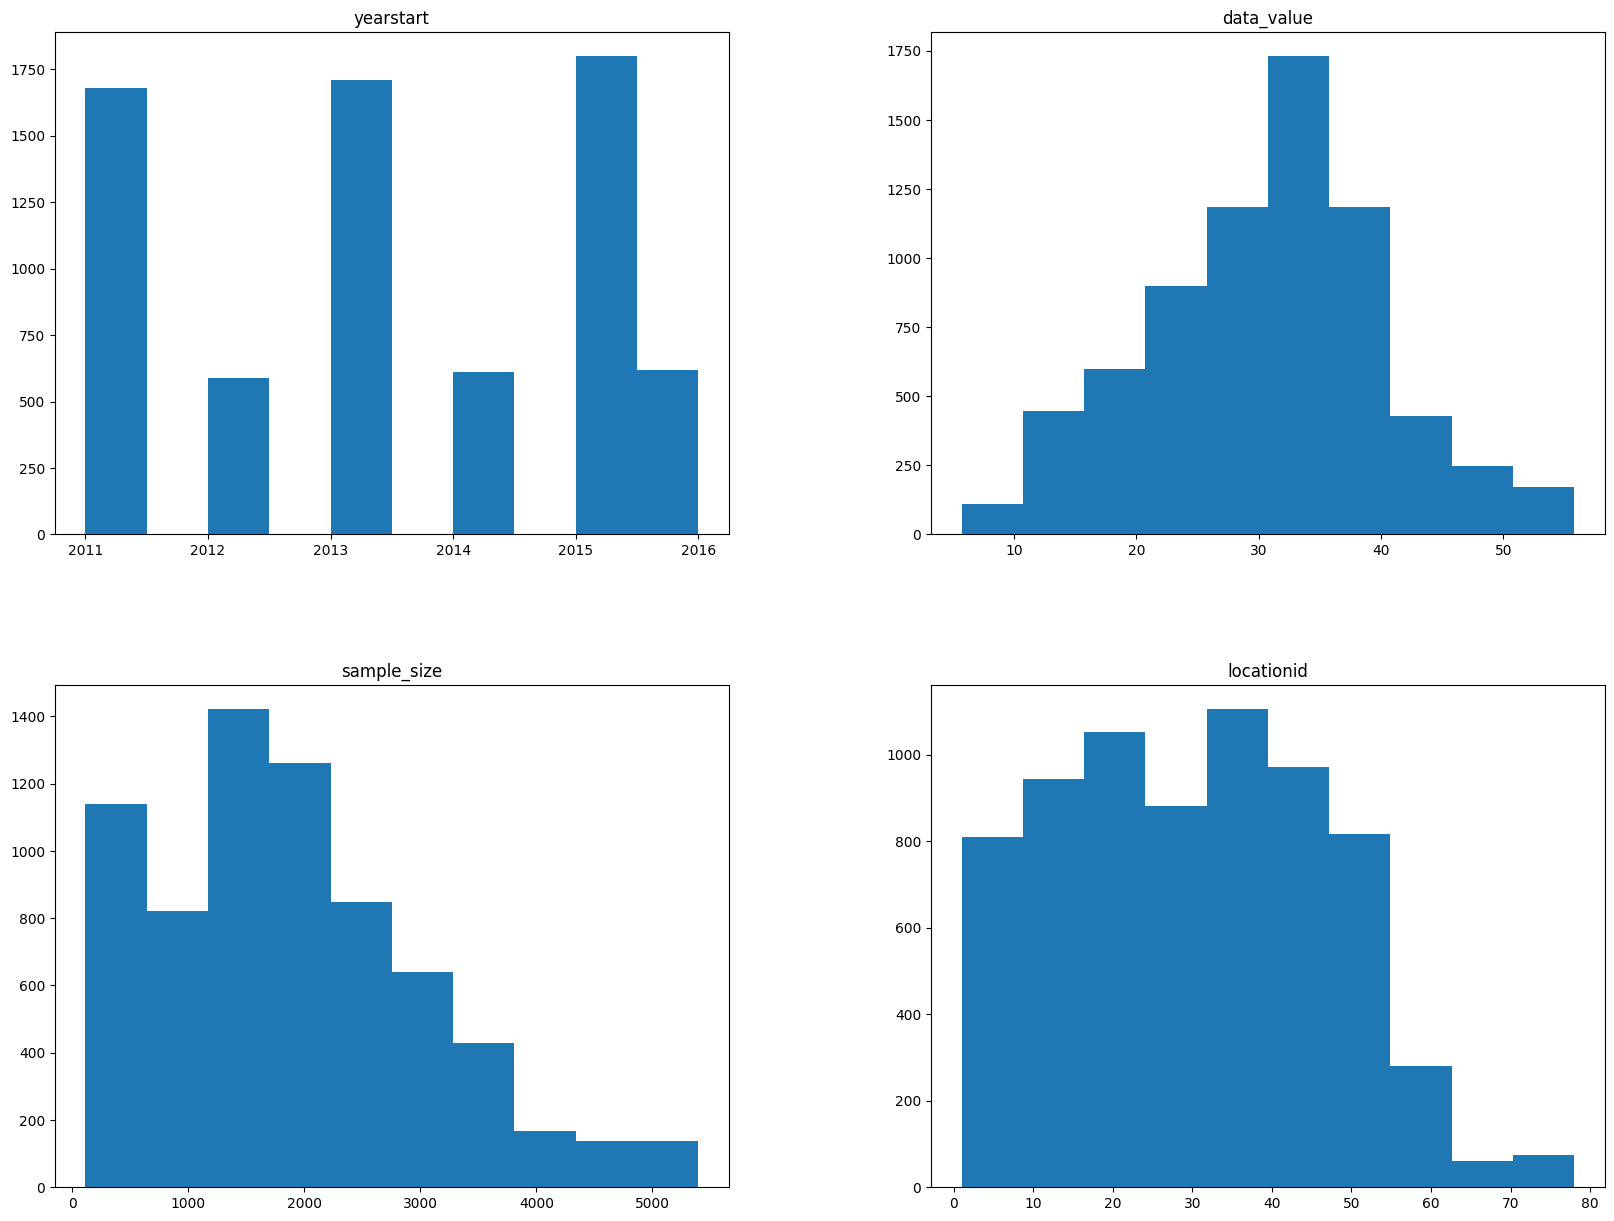

In [36]:
num.hist(figsize=(20,15), grid=False)
plt.show()

### Plot relationships between Numerical variables

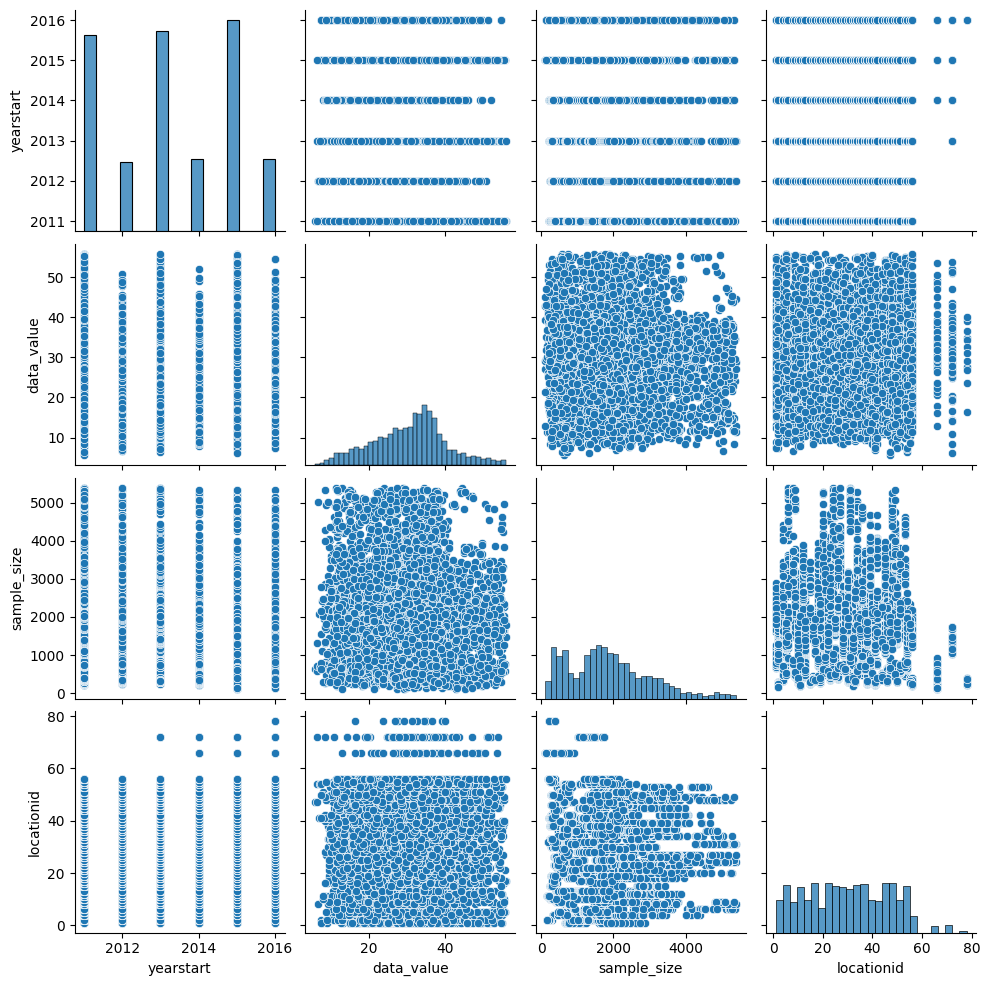

In [37]:
sns.pairplot(num)

In [38]:
num.corr()

,yearstart,data_value,sample_size,locationid
yearstart,1.000000,0.018635,-0.082100,0.045116
data_value,0.018635,1.000000,-0.123163,-0.005925
sample_size,-0.082100,-0.123163,1.000000,0.014645
locationid,0.045116,-0.005925,0.014645,1.000000


<Axes: >

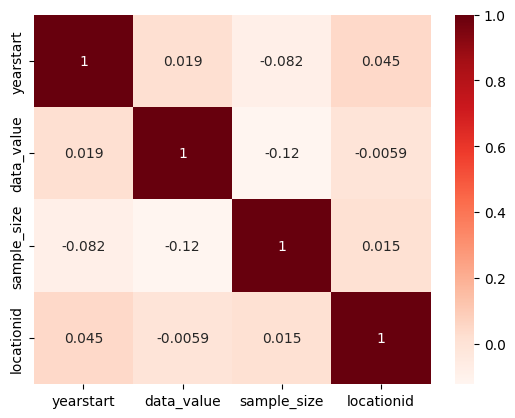

In [39]:
corr = num.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True, cmap='Reds')

### X/Y split

In [40]:
X = df[['yearstart','education', 'locationid']]
y = num['data_value']

###  Train/test split 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,yearstart,education,locationid
36867,2015,2,34
26193,2013,3,41
35854,2015,1,16


In [42]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [43]:
X_test_scaled=std_scaler.transform(X_test)

In [44]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 1.00717438  0.49607887  0.2469592 ]
 [-0.18168921  1.39990137  0.66817971]
 [ 1.00717438 -0.40774363 -0.83617925]
 ...
 [-0.18168921  0.49607887 -1.49809719]
 [-1.3705528  -1.31156614 -1.73879462]
 [-1.3705528   1.39990137  1.57079508]]
--------
[[-1.3705528  -1.31156614 -0.41495874]
 [ 1.00717438  0.49607887 -0.83617925]
 [-0.18168921 -1.31156614 -0.59548182]
 ...
 [ 1.00717438 -1.31156614  0.2469592 ]
 [-0.77612101  1.39990137  0.66817971]
 [-0.18168921  0.49607887  0.12661048]]


###  creating the model

In [45]:
X_train_const_scaled = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_const_scaled).fit()

predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) 

predictions_test = model.predict(X_test_const_scaled) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             data_value   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     65.94
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           8.51e-42
Time:                        11:21:12   Log-Likelihood:                -17981.
No. Observations:                4901   AIC:                         3.597e+04
Df Residuals:                    4897   BIC:                         3.600e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8736      0.136    227.718      0.0

In [46]:
predictions_test

array([33.16420037, 30.26749039, 33.41775408, ..., 33.49757619,
       27.97064151, 29.88108311])

In [47]:
model.rsquared_adj

0.03824109444939472

### model fitting

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### model parameters

In [49]:
model.coef_

array([ 0.1114476 , -1.70701845, -0.01021951])

In [50]:
model.intercept_

-190.7218656873064

In [51]:
model.score(X_test_scaled,y_test)

c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-567.2358596232997

### models prediction

In [52]:
y_pred=model.predict(X_test_scaled)  

c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
y_test

13033    32.5
46434    30.1
11275    30.5
4271     44.7
146       7.7
         ... 
52614    12.8
22079    25.4
36868    38.5
25882    19.3
20016    19.0
Name: data_value, Length: 2101, dtype: float64

In [54]:
y_pred

array([-188.63150223, -191.44788897, -188.49716139, ..., -188.37327473,
       -193.20484844, -191.59022419])

In [55]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

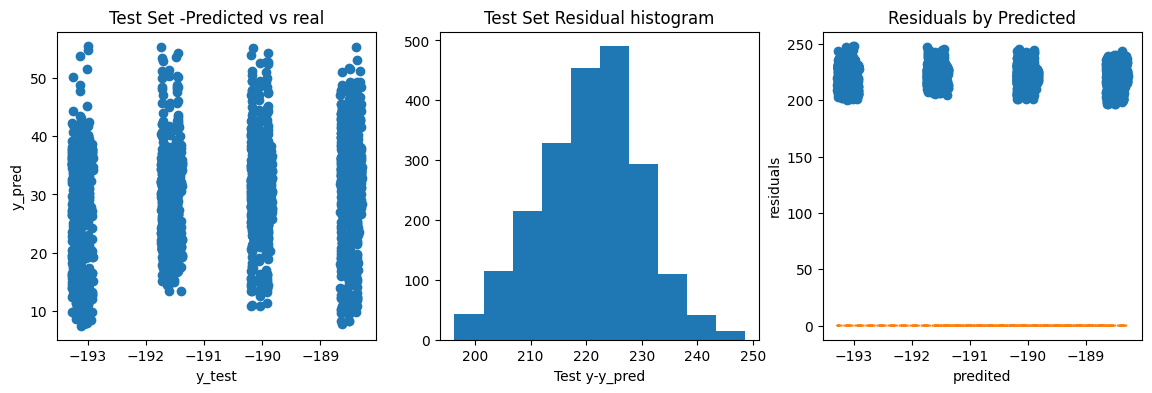

In [56]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<Axes: xlabel='y_test', ylabel='y_pred'>

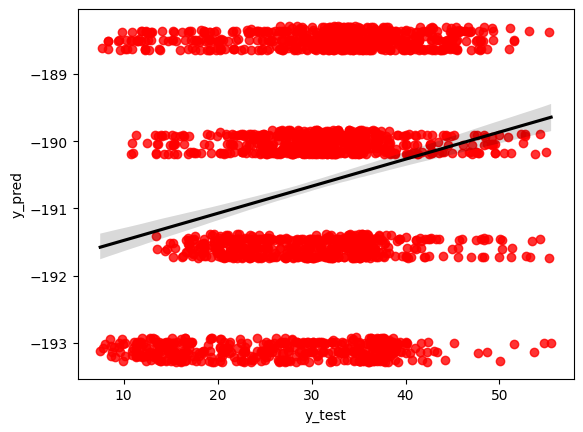

In [57]:
sns.regplot(x='y_test',y='y_pred', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Evaluating the model using mean squared error and R-squared


In [58]:
mse = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)


Mean Squared Error: 48825.301416812814
R-squared: -567.2358596232997
Adjusted R-squared: -568.0487864611013


In [59]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [60]:
features_importances

,Attribute,Importance
1,education,1.707018
0,yearstart,0.111448
2,locationid,0.010220


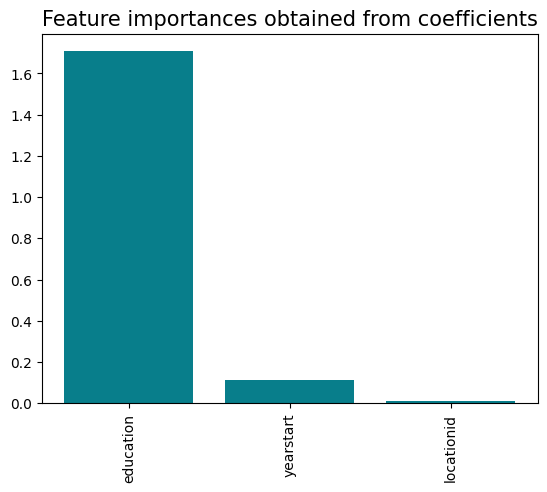

In [61]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()